## Классификация картинок

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [3]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
# описание данных
for line in data['DESCR'].split('\n'):
    print( line )

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [5]:
# закодированные признаки

X = pd.DataFrame( data['data'] )
X.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [6]:
# целевая переменная - цифра от 0 до 9

Y = pd.Series( data['target'] )
Y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [7]:
Y.tail()

1792    9
1793    0
1794    8
1795    9
1796    8
dtype: int32

In [8]:
Ydummy = pd.get_dummies( Y )
Ydummy.head()

0  1  2  3  4  5  6  7  8  9
0  1  0  0  0  0  0  0  0  0  0
1  0  1  0  0  0  0  0  0  0  0
2  0  0  1  0  0  0  0  0  0  0
3  0  0  0  1  0  0  0  0  0  0
4  0  0  0  0  1  0  0  0  0  0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Ydummy, test_size = 0.3, random_state = 0 )

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# зададим пока одно значение параметра модели max_depth
depth = 5

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cross_val_score( DecisionTreeClassifier( max_depth = depth ), X, Ydummy, cv = 5, scoring = 'accuracy' )

array([0.43888889, 0.37222222, 0.5097493 , 0.63788301, 0.50696379])

In [15]:
# средние значения для каждого варианта max_depth
means = []

# стандартное отклонение для каждого варианта max_depth
stds = []

In [16]:
# попробуем посчитать какое значение max_depth дает максимальную точность
# варианты scoring:
# http://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values



In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


ValueError: shape mismatch: objects cannot be broadcast to a single shape

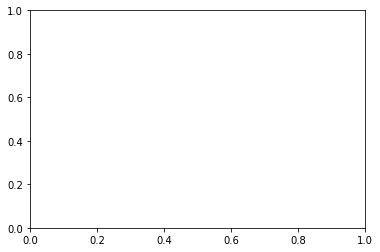

In [18]:
plt.errorbar( range( 1, 20 ), means, stds )

Можно то же самое с помощью grid search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [21]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [22]:
gs.fit( X, Ydummy )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [23]:
gs.cv_results_

{'mean_fit_time': array([0.00564814, 0.00630577, 0.00930754, 0.01096265, 0.01297394,
        0.0162816 , 0.01695792, 0.01762795, 0.01895444, 0.01895118,
        0.01928075, 0.02026804, 0.01994491, 0.01960309, 0.02094897,
        0.01994459, 0.01995063, 0.02162854, 0.01993783]),
 'std_fit_time': array([4.73013608e-04, 4.55129862e-04, 1.24472971e-03, 1.66896790e-05,
        1.54197829e-05, 2.05258719e-03, 8.15373469e-04, 4.77178491e-04,
        8.01816400e-04, 2.69739830e-06, 4.68953945e-04, 4.78368855e-04,
        8.24845315e-04, 4.68090030e-04, 8.25208512e-04, 8.11287438e-04,
        8.10015114e-04, 2.35828805e-03, 8.00707949e-04]),
 'mean_score_time': array([0.00300495, 0.00200566, 0.00133284, 0.00166043, 0.00166345,
        0.0019985 , 0.00166376, 0.00231973, 0.00199382, 0.00198507,
        0.00132044, 0.00200351, 0.00166456, 0.0019985 , 0.00166345,
        0.00166217, 0.00198293, 0.00165304, 0.00200351]),
 'std_score_time': array([1.32092404e-05, 1.42737327e-05, 4.66946316e-04, 4.46

In [24]:
gs.best_params_

{'max_depth': 13}